In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
5,6,Female,22,17,76
163,164,Female,31,81,93
171,172,Male,28,87,75
170,171,Male,40,87,13
193,194,Female,38,113,91


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# data Visulization

In [11]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

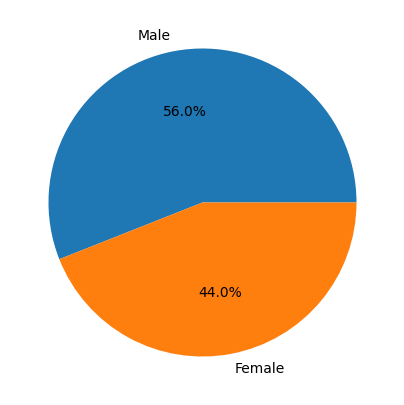

In [12]:
plt.figure(figsize=(5,5))
plt.pie(df['Gender'].value_counts(),labels=['Male', 'Female'],autopct='%1.1f%%')
plt.show()

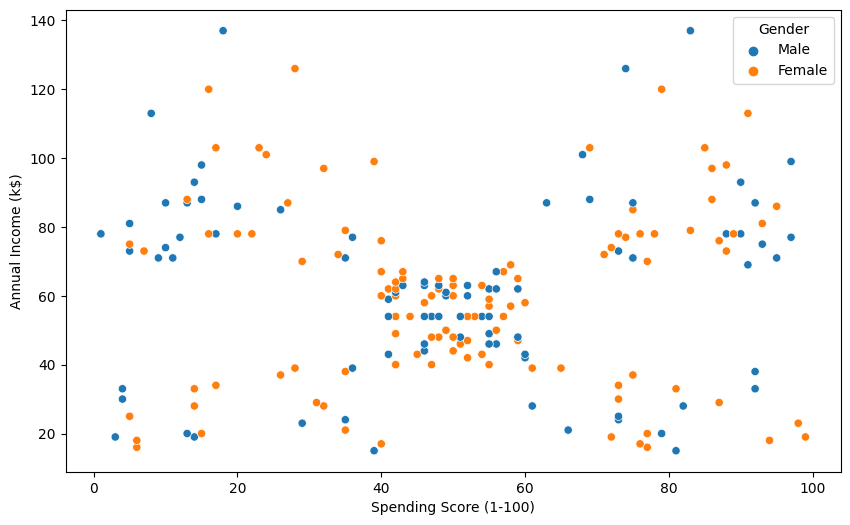

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Spending Score (1-100)', y = 'Annual Income (k$)', hue = 'Gender', data = df)
plt.show()

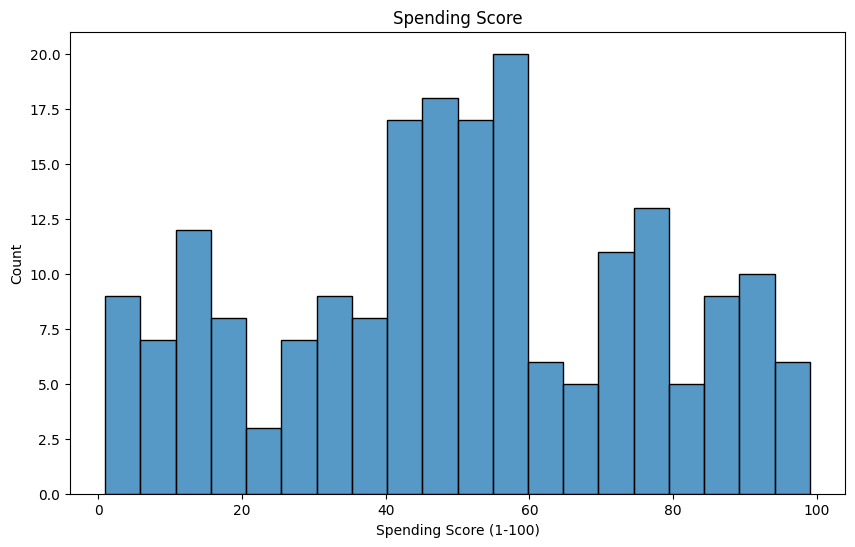

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['Spending Score (1-100)'],bins=20)
plt.title('Spending Score')
plt.show()

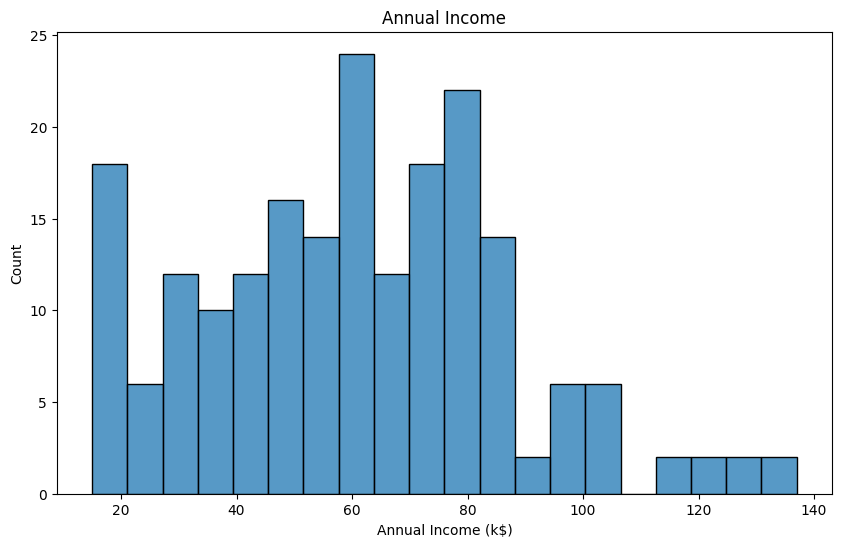

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['Annual Income (k$)'],bins=20)
plt.title('Annual Income')
plt.show()

# Data Preprocessing 

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
e=['Gender']

for i in e:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i])

Gender 0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32


In [19]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


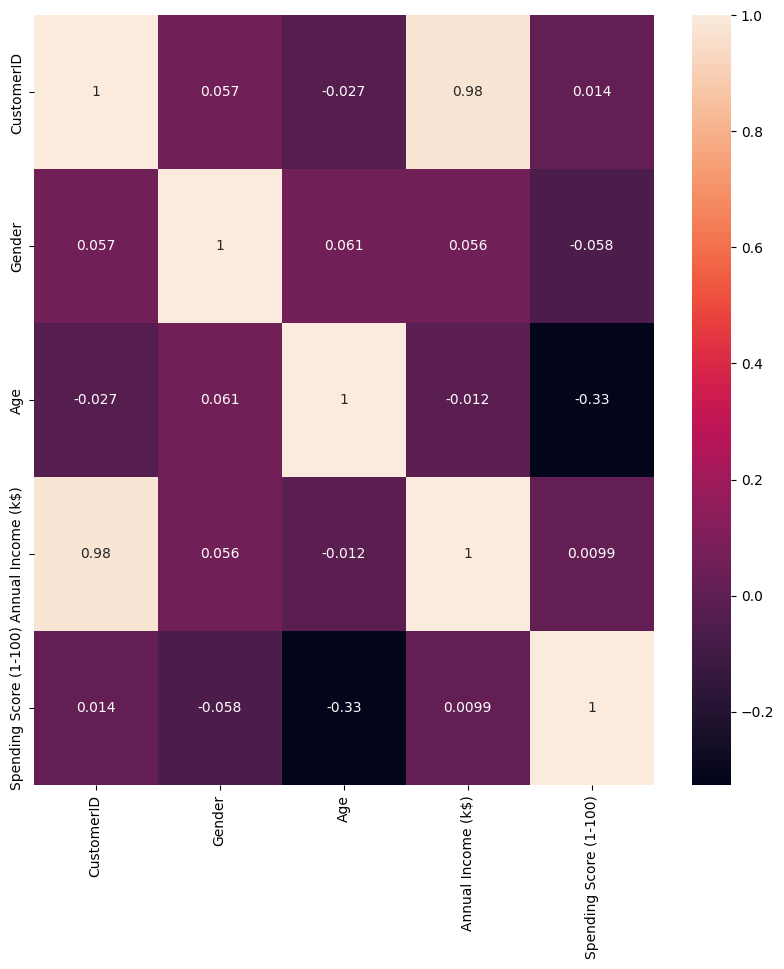

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

In [23]:
df = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [24]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061
196,1.671450,-0.886405,0.441365,2.497807,-0.861839
197,1.688771,1.128152,-0.491602,2.497807,0.923953
198,1.706091,1.128152,-0.491602,2.917671,-1.250054


In [25]:
from sklearn.cluster import KMeans

In [26]:
max_clusters = 30
kmeans = [KMeans(n_clusters=i, n_init=10) for i in range(1,max_clusters)]
inertias = [kmeans[i].fit(df).inertia_ for i in range(len(kmeans))]

In [27]:
km = KMeans(n_clusters=10, n_init=10)

In [28]:
km.fit(df)

KMeans(n_clusters=10, n_init=10)

In [29]:
cl = km.predict(df)

In [30]:
cl

array([5, 5, 6, 8, 6, 8, 6, 8, 0, 8, 0, 8, 6, 8, 6, 5, 6, 5, 0, 8, 5, 5,
       6, 5, 6, 5, 6, 5, 6, 8, 0, 8, 0, 5, 6, 8, 6, 8, 6, 8, 4, 5, 0, 8,
       6, 8, 4, 1, 1, 1, 4, 5, 1, 0, 4, 0, 4, 0, 1, 0, 0, 5, 4, 4, 0, 5,
       4, 4, 5, 1, 0, 4, 4, 4, 0, 5, 4, 0, 1, 4, 0, 5, 0, 4, 1, 0, 4, 1,
       1, 4, 4, 5, 0, 1, 1, 5, 4, 1, 0, 5, 1, 4, 0, 5, 0, 1, 4, 0, 0, 0,
       0, 1, 1, 5, 1, 1, 4, 4, 4, 4, 3, 1, 1, 3, 1, 7, 2, 3, 2, 3, 2, 3,
       1, 7, 2, 7, 9, 3, 2, 7, 9, 3, 1, 7, 2, 3, 2, 7, 9, 3, 2, 3, 9, 7,
       9, 7, 2, 7, 2, 7, 9, 7, 2, 7, 2, 7, 2, 7, 9, 3, 2, 3, 2, 3, 9, 7,
       2, 3, 2, 3, 9, 7, 2, 7, 9, 3, 9, 3, 9, 7, 9, 7, 2, 7, 9, 7, 9, 3,
       2, 3])

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2)

In [33]:
df = pd.DataFrame(pca.fit_transform(df),columns=['PCA1','PCA2'])

In [34]:
df

,PCA1,PCA2
0,-2.316965,-0.454190
1,-2.272391,-1.474104
2,-2.454223,-0.006922
3,-2.386461,-1.749935
4,-2.397377,-0.369341
...,...,...
195,2.727733,-1.116329
196,2.834568,0.739030
197,3.073113,-0.644900
198,3.331988,0.854022


In [35]:
km.cluster_centers_

array([[-0.53361155,  1.12815215,  1.38261288, -0.47793998, -0.3467064 ],
       [-0.10536774, -0.88640526, -0.7906297 , -0.09294256, -0.14202221],
       [ 1.02192275,  1.12815215,  0.04664835,  0.93858626, -1.40339942],
       [ 1.00232298,  1.12815215, -0.42361233,  0.9730392 ,  1.20592027],
       [-0.34052545, -0.88640526,  1.09300668, -0.27940022, -0.02639866],
       [-0.83769323,  1.12815215, -1.029852  , -0.80384818,  0.44750672],
       [-1.34483054, -0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ],
       [ 1.08831886, -0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [-1.32008665, -0.88640526, -0.93245435, -1.29459798,  1.12360689],
       [ 1.22111108, -0.88640526,  0.41265847,  1.21277   , -1.11029664]])

In [36]:
pca_centers = pca.transform(km.cluster_centers_)

C:\Users\Niraj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [37]:
pca_centers

array([[-0.6746207 ,  1.44478599],
       [-0.18793415, -0.66007362],
       [ 1.43614858,  1.28916132],
       [ 1.51987037, -0.82355273],
       [-0.54009931,  0.54922015],
       [-1.02650493, -0.76512148],
       [-1.96421267,  0.70590647],
       [ 1.42489035, -1.35281137],
       [-1.85720982, -1.65632691],
       [ 1.60752388,  0.86391335]])